<font face="Roboto" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>Credit Card Fraud Detection</b>
<br>
<b><font size=5>Artificial Intelligence Course</b>
<br>
<b><font size=5>Professor: Dr. Mehdi Ghatee</b>
<br>
<font size=4>
<b>Mahsa Goodarzi - 9912043</b>
<br>
<hr>
</div>
</font>

# Imports

In [ ]:
!pip install permetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 950.8 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from permetrics import ClusteringMetric
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cluster, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Dataset/creditcard.zip"

Archive:  /content/drive/My Drive/Dataset/creditcard.zip
  inflating: creditcard.csv          


In [ ]:
data = pd.read_csv('creditcard.csv')

# Preprocessing

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


**Features and Trget Varibles**

In [ ]:
basic_samples = data.drop(columns='Class')

target_labels = data['Class'].ravel()

print(f"Features: \n{basic_samples}")
print(f"Targets Variables: \n{target_labels}")

Features: 
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  .

**Standardize Features And Apply PCA**

In [ ]:
normalized_samples = StandardScaler().fit_transform(basic_samples)

samples_pca = PCA(n_components=2).fit_transform(normalized_samples)

print(samples_pca)

[[ 0.4186754  -2.55306205]
 [-0.40223595 -2.06116935]
 [ 1.86772444 -2.56561517]
 ...
 [-0.20098487  2.06121203]
 [-0.45804506  1.21593168]
 [ 0.77231747  1.88847517]]


# Clustering

**Kmeans**

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=42)
kmeans.fit(samples_pca)
kmeans_labels = kmeans.predict(samples_pca)

**Plot Clusters**

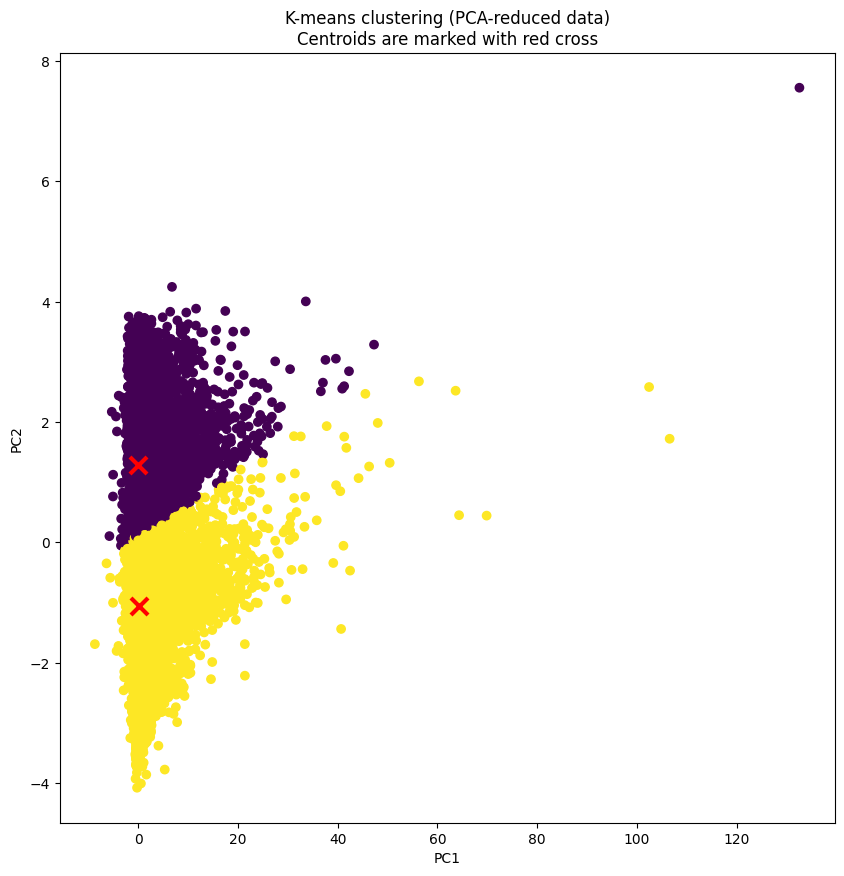

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(samples_pca[:, 0], samples_pca[:, 1], c=kmeans_labels)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='r', zorder=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering (PCA-reduced data)\nCentroids are marked with red cross")
plt.show()

**Contingency Matrix**

In [ ]:
conting_matrix = cluster.contingency_matrix(labels_true=target_labels, labels_pred=kmeans_labels)
t0, f1, f0, t1 = conting_matrix.ravel()
sum_contin_matrix = np.sum(conting_matrix)
t0_p, f1_p, f0_p, t1_p = ["{:.5f}%".format(item/sum_contin_matrix * 100) for item in [t0, f1, f0, t1]]

print(f"Contingency Matrix: \n{conting_matrix}\n")
print(f"True 0 predicted (Actual = 0 , Predicted = 0): {t0} ({t0_p})")
print(f"False 1 predicted (Actual = 0 , Predicted = 1): {f1} ({f1_p})")
print(f"False 0 predicted (Actual = 1 , Predicted = 0): {f0} ({f0_p})")
print(f"True 1 predicted (Actual = 1 , Predicted = 1): {t1} ({t1_p})")

Contingency Matrix: 
[[127959 156356]
 [   173    319]]

True 0 predicted (Actual = 0 , Predicted = 0): 127959 (44.92832%)
False 1 predicted (Actual = 0 , Predicted = 1): 156356 (54.89893%)
False 0 predicted (Actual = 1 , Predicted = 0): 173 (0.06074%)
True 1 predicted (Actual = 1 , Predicted = 1): 319 (0.11201%)


**Purity Score**

In [ ]:
purity = ClusteringMetric(y_true=target_labels, y_pred=kmeans_labels, decimal = 10).purity_score()
print(f"Clustering Purity: {purity}")

Clustering Purity: 0.5501093723


# Classification

**Train Data and Test Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(basic_samples, target_labels, test_size=0.2, random_state=10)

**Logistic Regression**

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
y_predict = logistic_regression_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)
tn, fp, fn, tp = conf_matrix.ravel()
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56852    16]
 [   24    70]]


**Performance Evaluation**

In [ ]:
accuracy = (tp + tn) / (tp + tn + fn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = (2 * precision * recall)/(precision + recall)

print(f"Accuracy: {(accuracy)}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9992977774656788
Recall: 0.7446808510638298
Precision: 0.813953488372093
F1-Score: 0.7777777777777778


**Confusion Matrix Heatmap**

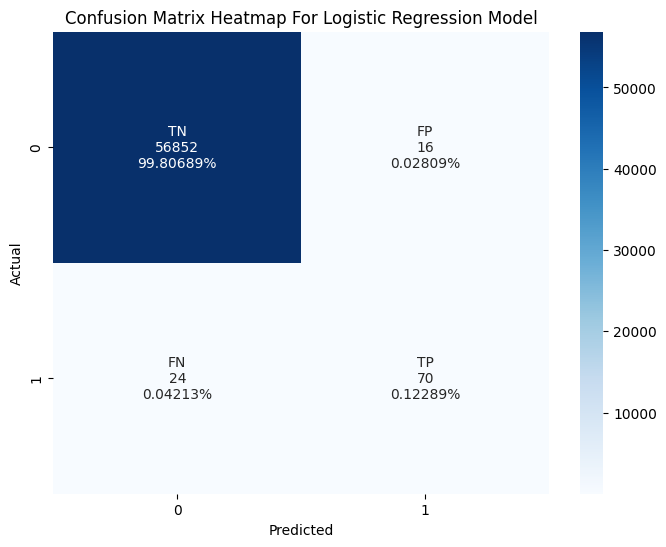

In [ ]:
sum_cf_matrix = np.sum(conf_matrix)
tn_p, fp_p, fn_p, tp_p = ["{:.5f}%".format(item/sum_cf_matrix * 100) for item in [tn, fp, fn, tp]]
cf_matrix_details = np.array([[f"TN\n{tn}\n{tn_p}", f"FP\n{fp}\n{fp_p}"], [f"FN\n{fn}\n{fn_p}", f"TP\n{tp}\n{tp_p}"]])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=cf_matrix_details, fmt="", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap For Logistic Regression Model')
plt.show()